In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
# iris

In [33]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set
# data of the images

# iris.data

In [34]:
# anwser/output data of the images, for each data array e.g.  [4.9, 3. , 1.4, 0.2],
# where, 0 == Iris setosa,
# 1 == Iris versicolor, and
# 2 == Iris virginica

# iris.target

In [35]:
'''
   M/L Step 1. Import the data 
   M/L Step 2. Clean the data - here assuming Iris data already cleaned for the classification purpose
'''
x = iris.data
y = iris.target

# type(iris.data) == numpy.ndarray
# type(iris.target) == numpy.ndarray

feature_names = iris.feature_names
target_names = iris.target_names

# feature_names
# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']

# target_names
# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
''' M/L Step 3. Split data between training and test sets. Training Set/Test Set '''
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # test_size=0.2 == 20% i.e. 80% train data, 20% test data
# print(x_train.shape)
# print(x_test.shape)

In [37]:
''' 
    M/L Step 4. Create a Model, and train it
    
    Tip: One of the jobs of Machine Learning Engineer is to identify which model to use for a purpose!!
'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# pass both input train data of images i.e. x_train and expected output/target train data i.e. y_train
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
''' M/L Step 5. Check the output '''
from sklearn import metrics
# pass input test data of images i.e. x_test
y_pred = knn.predict(x_test)
# compare output y_test data with prediction of x_test data
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [39]:
''' 
    Test the samples with the model 
    ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
'''
sample = [[3,5,4,2], [2,3,5,4]]
predictions = knn.predict(sample)
predicted_species = [iris.target_names[p] for p in predictions]
print('predictions:', predicted_species)

predictions: ['versicolor', 'virginica']


In [43]:
''' 
    M/L Step 7. Persist model: Save as binary file i.e. a trained model ready-to-use 
    Model can be retrained and dumped again to update the binary file
'''
from joblib import dump, load
dump(knn, 'mlbrain.joblib')

['mlbrain.joblib']

In [44]:
''' 
    Test the samples with the trained model binary file 
    ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
'''
trained_model = load('mlbrain.joblib')
sample = [[3,5,4,2], [2,3,5,4]]
predictions = trained_model.predict(sample)
predicted_species = [iris.target_names[p] for p in predictions]
print('trained_model predictions:', predicted_species)

trained_model predictions: ['versicolor', 'virginica']


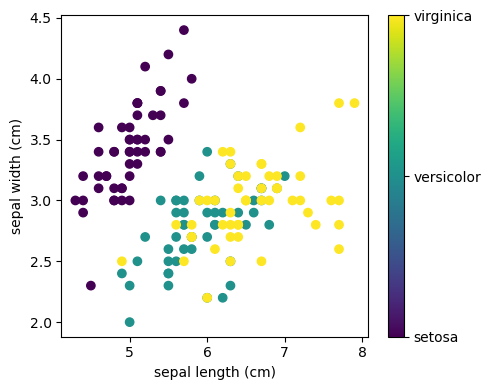

In [45]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

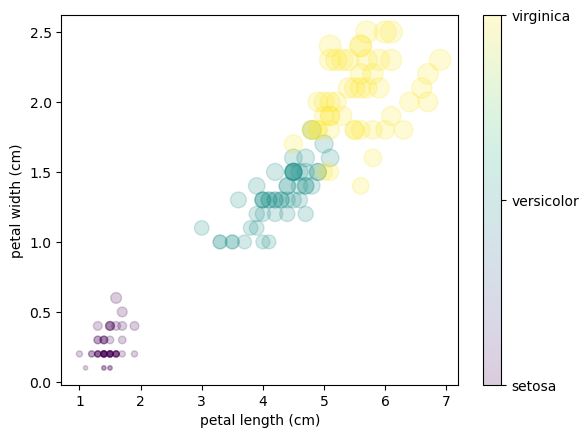

In [46]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)